# Explore flight delay data wrt day of week

In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set_style('white')

# 0. Load and process data

In [3]:
# Load data
from flightdelay.fld import io as flio
airlines_df, airports_df, flights_df = flio.load_data()

### Restrict analysis to airports with at least 20 flights/day

In [4]:
# Find all unique airports
all_airports, airport_inverse, airport_count = np.unique(flights_df['ORIGIN_AIRPORT'],return_counts=True,return_inverse=True)

# Determine number of flights for the origin airport
Nflights_orig = np.zeros(len(airport_inverse))
for i in range(len(all_airports)):
    Nflights_orig[np.where(airport_inverse==i)] = airport_count[i]
    
flights_df = flights_df.loc[flights_df.index[Nflights_orig>=7300]]

### Remove cancelled flights

In [5]:
# Filter data to columns of interest (others have NaNs)
keys_keep = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY']
flights_df = flights_df[keys_keep]

flights_df = flights_df.dropna()
flights_df.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,...,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,...,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0
2,1,1,4,US,840,N171US,SFO,CLT,20,18.0,...,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0
3,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,...,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0
4,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,...,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0


# 1. Flight delay relationship to time of departure

# 1a. Annual trends in flight delay

In [7]:
# Compute mean flight delay for each month by airport
dft = flights_df[['ORIGIN_AIRPORT','MONTH','DEPARTURE_DELAY']]
dfgb = dft.groupby(['ORIGIN_AIRPORT','MONTH'])
df_mean_by_apmonth = dfgb.agg(['mean','sem'])

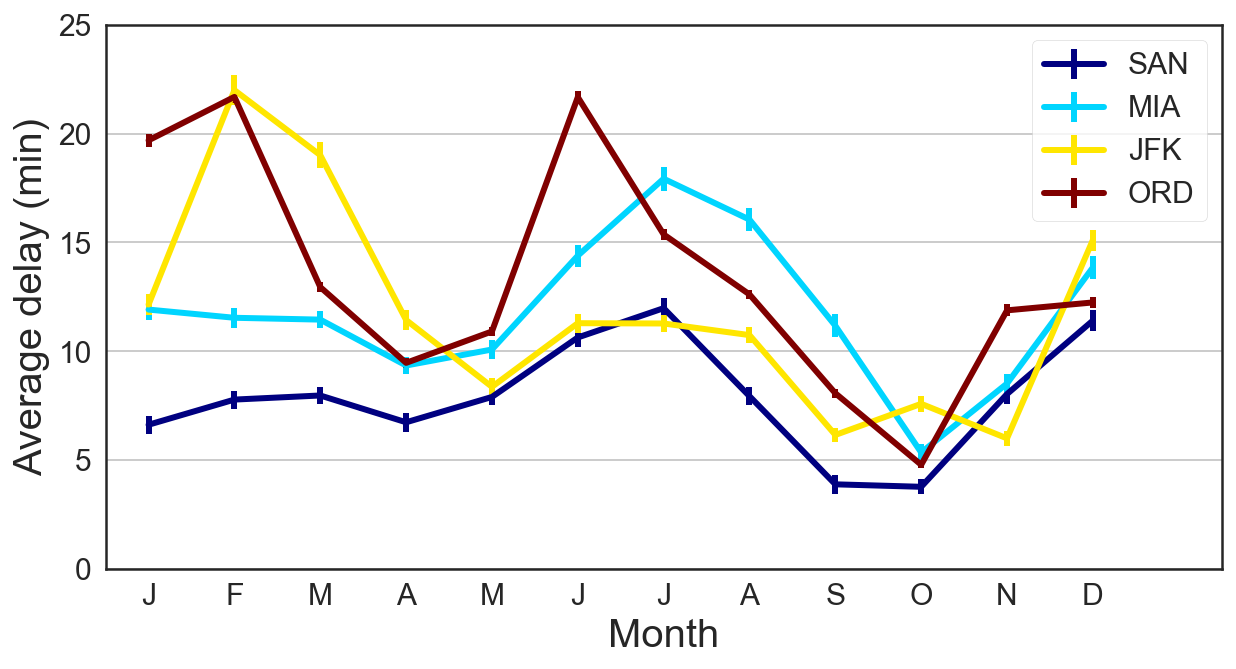

In [96]:
# Plot mean flight delay for many airports
def getcmaprgb(N, cmap):
	"""Get the RGB values of N colors across a colormap"""
	return cmap(np.linspace(0,255,N).astype(int))
from matplotlib import cm
colors = getcmaprgb(len(aps),cm.jet)

plt.figure(figsize=(10,5))  
aps = ['SAN','MIA','JFK','ORD']
for i, ap in enumerate(aps):
    means = df_mean_by_apmonth.loc[ap]['DEPARTURE_DELAY']['mean'].values
    sems = df_mean_by_apmonth.loc[ap]['DEPARTURE_DELAY']['sem'].values
    plt.errorbar(np.arange(1,13),means,yerr=sems,
             color=colors[i],label=ap,linewidth=3)
             
plt.ylabel('Average delay (min)', size=20)
plt.xlim((.5,13.5))
plt.yticks(np.arange(0,30,5), size=15)
plt.xticks(np.arange(1,13),['J','F','M','A','M','J','J','A','S','O','N','D'],size=15)
plt.legend(loc='best',fontsize=15,frameon=True)
plt.xlabel('Month',size=20)

ax = plt.gca()
ax.grid(True)
for line in ax.get_xgridlines():
    line.set_linewidth(0)
for line in ax.get_ygridlines():
    line.get_ydata
    line.set_linewidth(1)

# 1b. Weekly trends in flight delay

/Users/scott/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


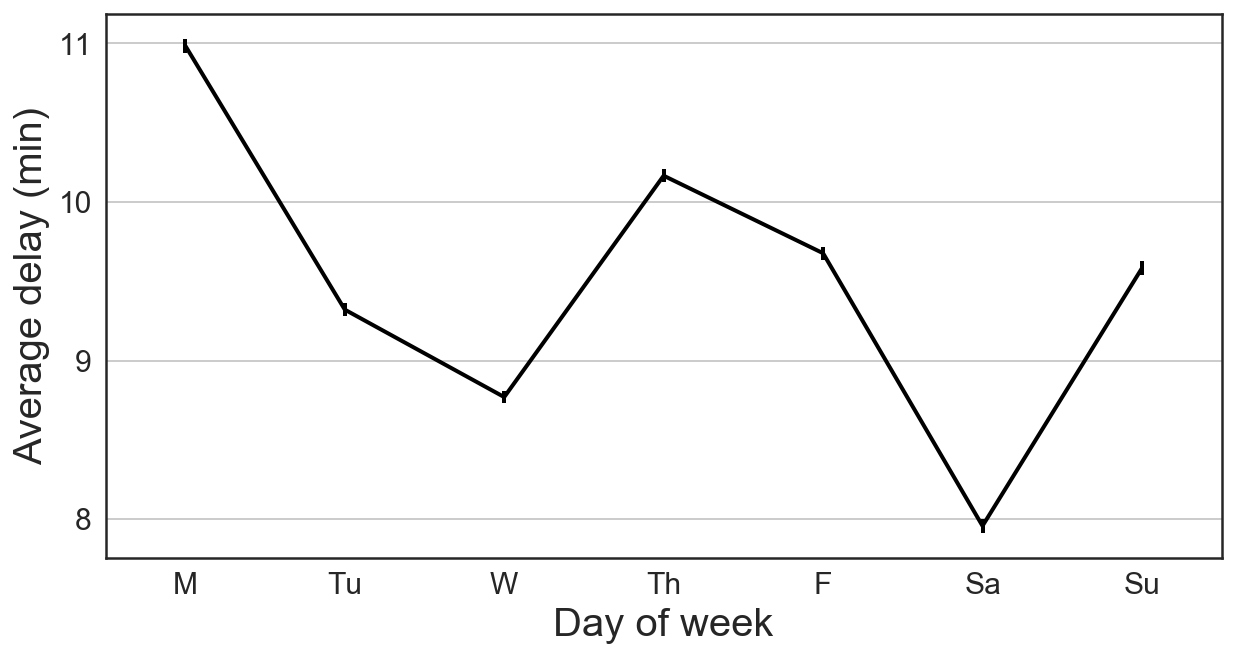

In [97]:
dft = flights_df[['DAY_OF_WEEK','DEPARTURE_DELAY']]
dfgb = dft.groupby('DAY_OF_WEEK')
df_mean_by_day = dfgb.agg(['mean','sem'])

plt.figure(figsize=(10,5))  
means = df_mean_by_day['DEPARTURE_DELAY']['mean'].values
sems = df_mean_by_day['DEPARTURE_DELAY']['sem'].values
plt.errorbar(np.arange(1,8),means,yerr=sems,linewidth=2,color='k')

plt.ylabel('Average delay (min)', size=20)
plt.xlim((.5,7.5))
plt.yticks(np.arange(8,12,1), size=15)
plt.xticks(np.arange(1,8),['M','Tu','W','Th','F','Sa','Su'],size=15)
plt.legend(loc='best',fontsize=15,frameon=True)
plt.xlabel('Day of week',size=20)

ax = plt.gca()
ax.grid(True)
for line in ax.get_xgridlines():
    line.set_linewidth(0)
for line in ax.get_ygridlines():
    line.get_ydata
    line.set_linewidth(1)

# 1c. Daily trends in flight delay

In [11]:
flights_df['HOUR_DEPARTURE'] = np.floor(flights_df['SCHEDULED_DEPARTURE'].values/100).astype(int)

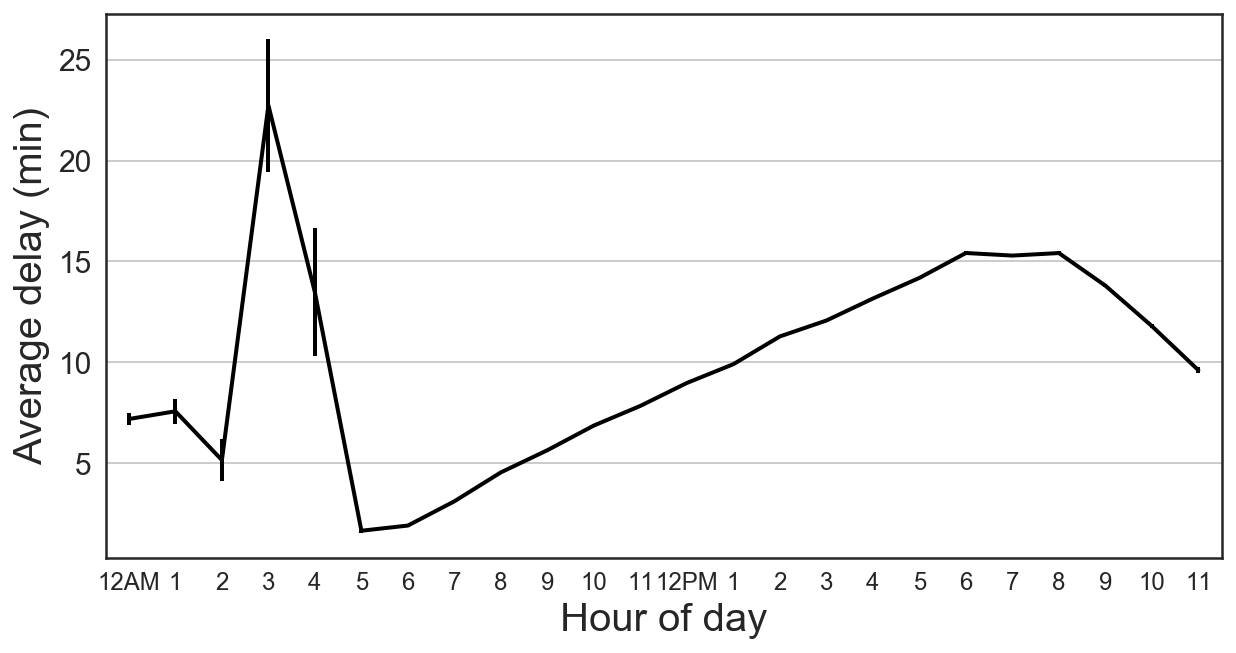

In [26]:
dft = flights_df[['HOUR_DEPARTURE','DEPARTURE_DELAY']]
dfgb = dft.groupby('HOUR_DEPARTURE')
df_mean_by_hour = dfgb.agg(['mean','sem'])
hs = df_mean_by_hour.index.values

plt.figure(figsize=(10,5))  
means = df_mean_by_hour['DEPARTURE_DELAY']['mean'].values
sems = df_mean_by_hour['DEPARTURE_DELAY']['sem'].values

plt.errorbar(hs,means,yerr=sems,linewidth=2,color='k')
plt.ylabel('Average delay (min)', size=20)
plt.xlabel('Hour of day',size=20)
plt.xlim((-.5,23.5))
plt.yticks(size=15)
plt.xticks(np.arange(24),['12AM', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, '12PM', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],size=12)


ax = plt.gca()
ax.grid(True)
for line in ax.get_xgridlines():
    line.set_linewidth(0)
for line in ax.get_ygridlines():
    line.get_ydata
    line.set_linewidth(1)

# 2. Flight delay across airports

In [100]:
dft = flights_df[['ORIGIN_AIRPORT','DEPARTURE_DELAY']]
dfgb = dft.groupby('ORIGIN_AIRPORT')
df_mean_by_ap = dfgb.agg(['mean','sem','count'])

In [101]:
# Get APs sorted by mean delay
sort_idx = np.argsort(df_mean_by_ap['DEPARTURE_DELAY']['mean'].values)
aps = np.array(list(df_mean_by_ap.index))[sort_idx]
aps_means = df_mean_by_ap['DEPARTURE_DELAY']['mean'].values[sort_idx]
aps_sems = df_mean_by_ap['DEPARTURE_DELAY']['sem'].values[sort_idx]

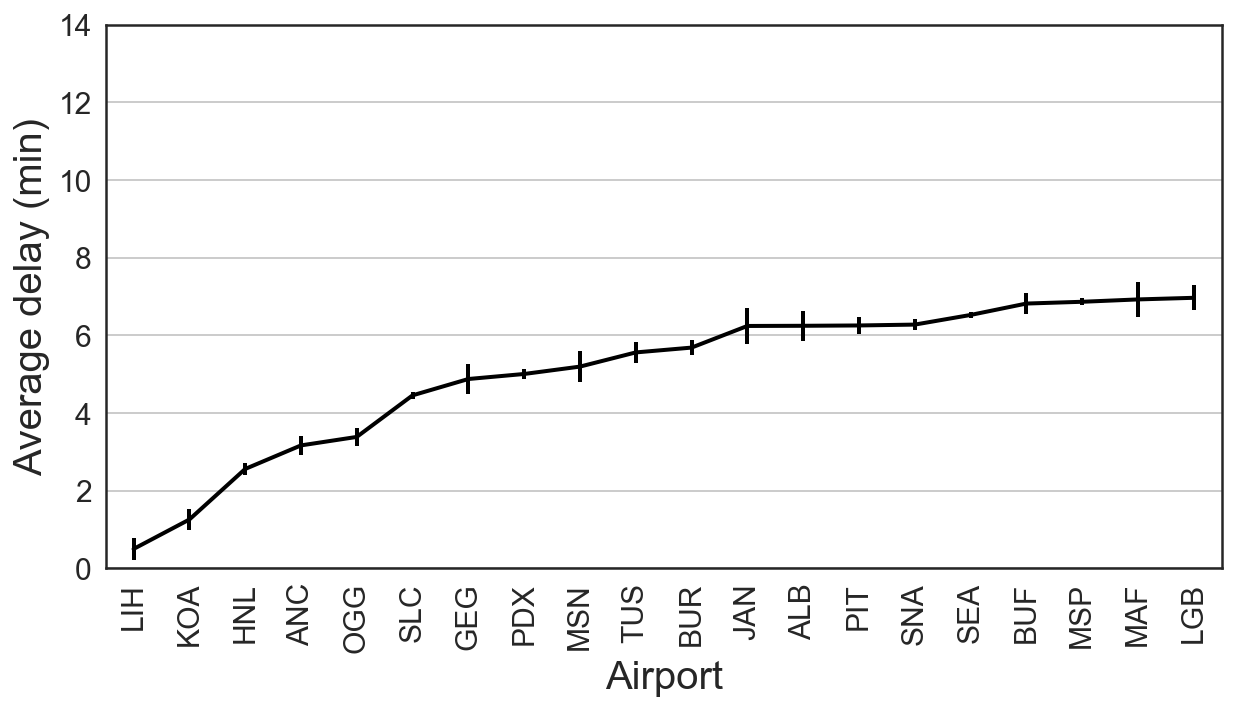

In [104]:
# Plot 20 flights least delay
N = 20
plt.figure(figsize=(10,5))  

plt.errorbar(np.arange(N),aps_means[:N],yerr=aps_sems[:N],linewidth=2,color='k')
plt.ylabel('Average delay (min)', size=20)
plt.xlabel('Airport',size=20)
plt.xlim((-.5,N-.5))
plt.yticks(size=15)
plt.xticks(np.arange(N),aps[:N],size=15,rotation='vertical')
plt.ylim((0,14))

ax = plt.gca()
ax.grid(True)
for line in ax.get_xgridlines():
    line.set_linewidth(0)
for line in ax.get_ygridlines():
    line.get_ydata
    line.set_linewidth(1)

Positive correlation between # flights departing an airport and the mean flight delay, r = 0.3   p = 0.002


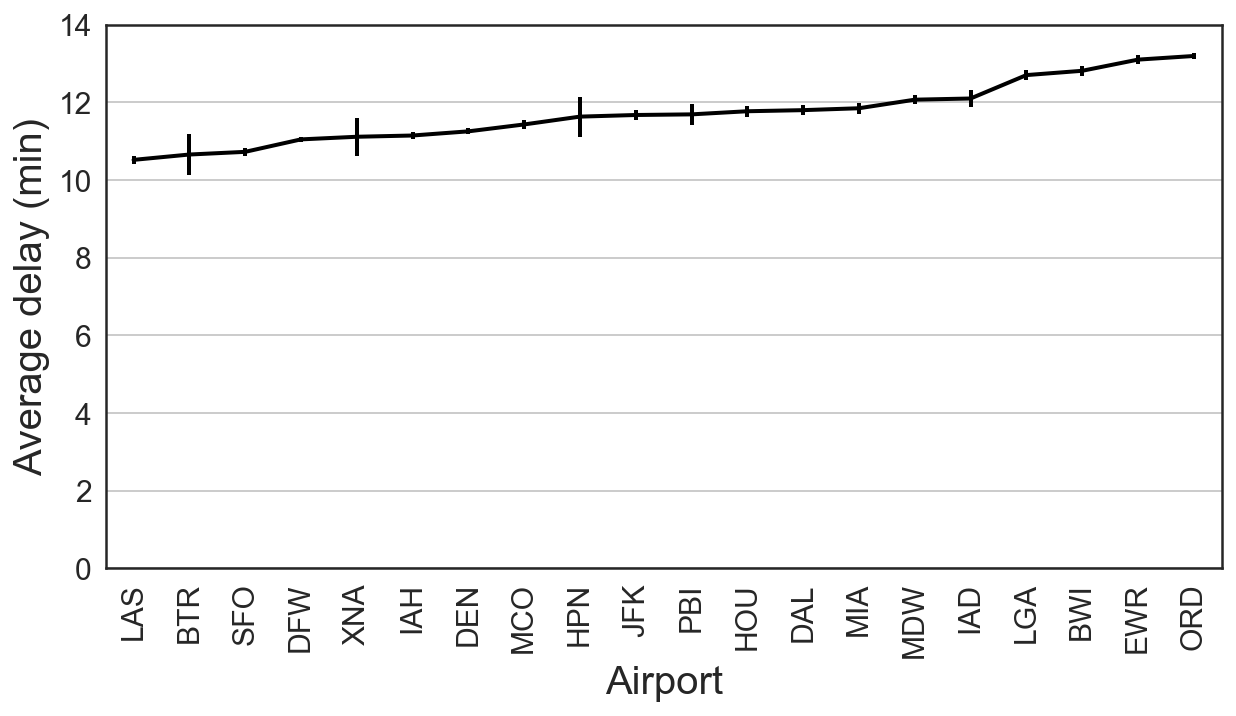

In [105]:
# Determine correltion between number of flights and the mean delay
r, p = sp.stats.spearmanr(df_mean_by_ap['DEPARTURE_DELAY']['mean'],df_mean_by_ap['DEPARTURE_DELAY']['count'])
print('Positive correlation between # flights departing an airport and the mean flight delay, r =',round(r,2),'  p =',round(p,3))

# Plot 20 flights most delayed
N = 20
plt.figure(figsize=(10,5))  

plt.errorbar(np.arange(N),aps_means[-N:],yerr=aps_sems[-N:],linewidth=2,color='k')
plt.ylabel('Average delay (min)', size=20)
plt.xlabel('Airport',size=20)
plt.xlim((-.5,N-.5))
plt.yticks(size=15)
plt.xticks(np.arange(N),aps[-N:],size=15,rotation='vertical')
plt.ylim((0,14))

ax = plt.gca()
ax.grid(True)
for line in ax.get_xgridlines():
    line.set_linewidth(0)
for line in ax.get_ygridlines():
    line.get_ydata
    line.set_linewidth(1)

# 3. Flight delays across airlines

In [68]:
# Find average delay by airline
dft = flights_df[['AIRLINE','DEPARTURE_DELAY']]
dfgb = dft.groupby('AIRLINE')
df_mean_by_al = dfgb.agg(['mean','sem','count'])

In [69]:
# Get airlines sorted by mean delay
sort_idx = np.argsort(df_mean_by_al['DEPARTURE_DELAY']['mean'].values)
als = np.array(list(df_mean_by_al.index))[sort_idx]
als_means = df_mean_by_al['DEPARTURE_DELAY']['mean'].values[sort_idx]
als_sems = df_mean_by_al['DEPARTURE_DELAY']['sem'].values[sort_idx]

In [78]:
# Get average for only SAN flights
def avg_delay_by_airline_one_airport(ap):
    gb_aph = flights_df[['AIRLINE','ORIGIN_AIRPORT','DEPARTURE_DELAY']].groupby(['ORIGIN_AIRPORT','AIRLINE'])
    mean_delays = gb_aph.agg(['mean','count','sem'])

    SAN_als = list(mean_delays.loc[ap].index)
    SAN_means = mean_delays.loc[ap]['DEPARTURE_DELAY']['mean'].values
    SAN_ss = mean_delays.loc[ap]['DEPARTURE_DELAY']['sem'].values

    N_SANals = len(SAN_als)
    SAN_als_idx = np.zeros(N_SANals)
    for i, al in enumerate(SAN_als):
        SAN_als_idx[i] = np.argwhere(als==al)[0][0]

    SAN_means = SAN_means[np.argsort(SAN_als_idx)]
    SAN_ss = SAN_ss[np.argsort(SAN_als_idx)]
    SAN_als_idx = SAN_als_idx[np.argsort(SAN_als_idx)]
    return SAN_means, SAN_ss, SAN_als_idx

SAN_means, SAN_ss, SAN_als_idx = avg_delay_by_airline_one_airport('SAN')
JFK_means, JFK_ss, JFK_als_idx = avg_delay_by_airline_one_airport('JFK')

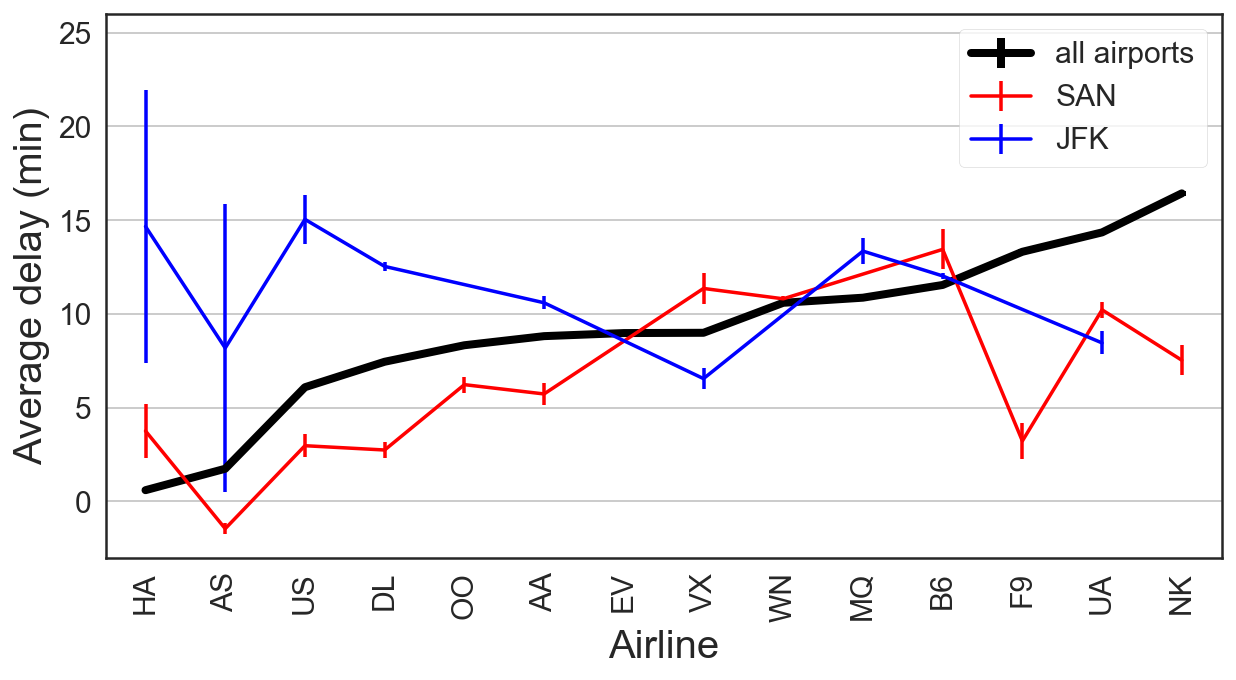

In [108]:
# Plot flight delay by airline
N = len(als)
plt.figure(figsize=(10,5))  
plt.errorbar(np.arange(N),als_means,yerr=als_sems,linewidth=4,color='k',label='all airports')
plt.errorbar(SAN_als_idx, SAN_means, yerr=SAN_ss,color='r',label='SAN')
plt.errorbar(JFK_als_idx, JFK_means, yerr=JFK_ss,color='b',label='JFK')
plt.ylabel('Average delay (min)', size=20)
plt.xlabel('Airline',size=20)
plt.xlim((-.5,N-.5))
plt.yticks(size=15)
plt.xticks(np.arange(N),als[:N],size=15,rotation='vertical')
plt.legend(loc='best',fontsize=15,frameon=True)
plt.ylim((-3,26))

ax = plt.gca()
ax.grid(True)
for line in ax.get_xgridlines():
    line.set_linewidth(0)
for line in ax.get_ygridlines():
    line.get_ydata
    line.set_linewidth(1)

In [62]:
# List airline codes
als = list(df_mean_by_al.index)
df_al, df_ap = flio.load_data_lines_and_ports()
df_al.loc[als]

,AIRLINE
IATA_CODE,
AA,American Airlines Inc.
AS,Alaska Airlines Inc.
B6,JetBlue Airways
DL,Delta Air Lines Inc.
EV,Atlantic Southeast Airlines
F9,Frontier Airlines Inc.
HA,Hawaiian Airlines Inc.
MQ,American Eagle Airlines Inc.
NK,Spirit Air Lines


# 4. Flight delay by duration

In [81]:
# Compute the number of half-hours in the flight (rounded down)
flights_df['HALFHRS'] = np.floor(flights_df['SCHEDULED_TIME'].values/30).astype(int)

/Users/scott/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


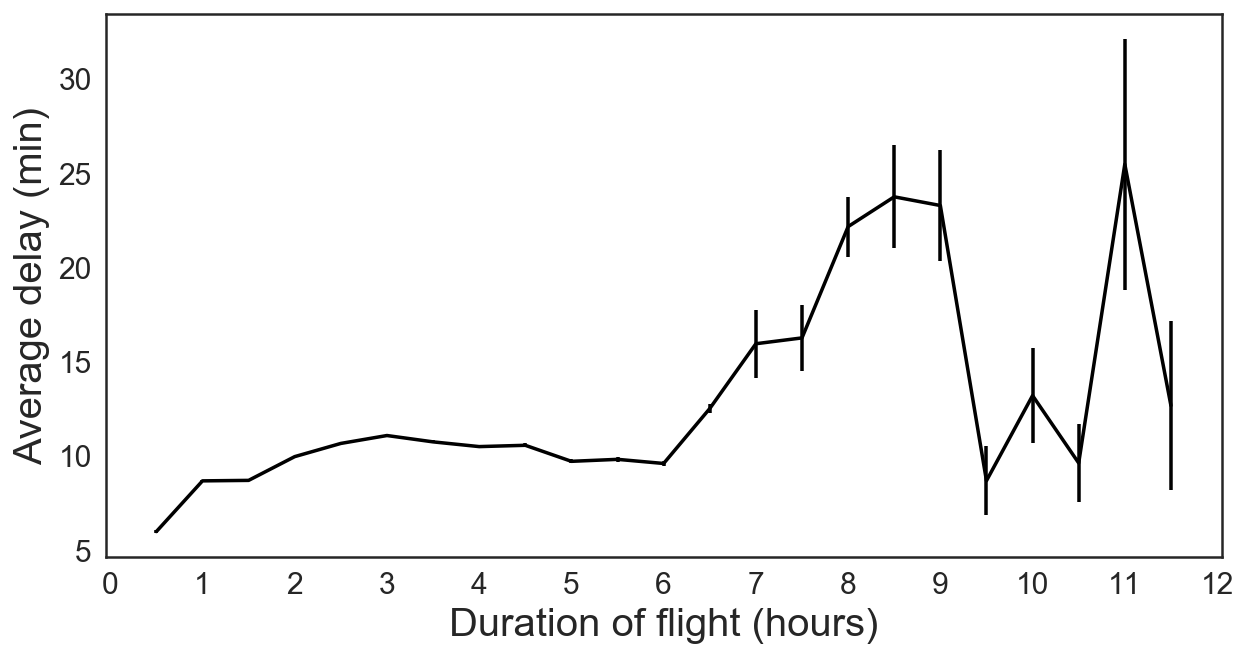

In [84]:
# Compute mean delay for each duration bin
gb_aph = flights_df[['HALFHRS','DEPARTURE_DELAY']].groupby(['HALFHRS'])
mean_delays = gb_aph.agg(['mean','sem','count'])

x = np.arange(len(hs))
hs = mean_delays.index.values
ds = mean_delays['DEPARTURE_DELAY']['mean'].values
plt.figure(figsize=(10,5))
plt.errorbar(hs/2, ds,yerr=mean_delays['DEPARTURE_DELAY']['sem'].values,color='k')
plt.xlabel('Duration of flight (hours)',size=20)
plt.ylabel('Average delay (min)', size=20)
plt.yticks(size=15)
plt.xticks(np.arange(13),size=15)
plt.legend(loc='best',fontsize=12)

### 4b. Duration effect on delay by airport

In [85]:
# Compute mean flight delay for each duration half hour separated by airport
gb_aph = flights_df[['ORIGIN_AIRPORT','HALFHRS','DEPARTURE_DELAY']].groupby(['ORIGIN_AIRPORT','HALFHRS'])
mean_delays = gb_aph.agg(['mean'])

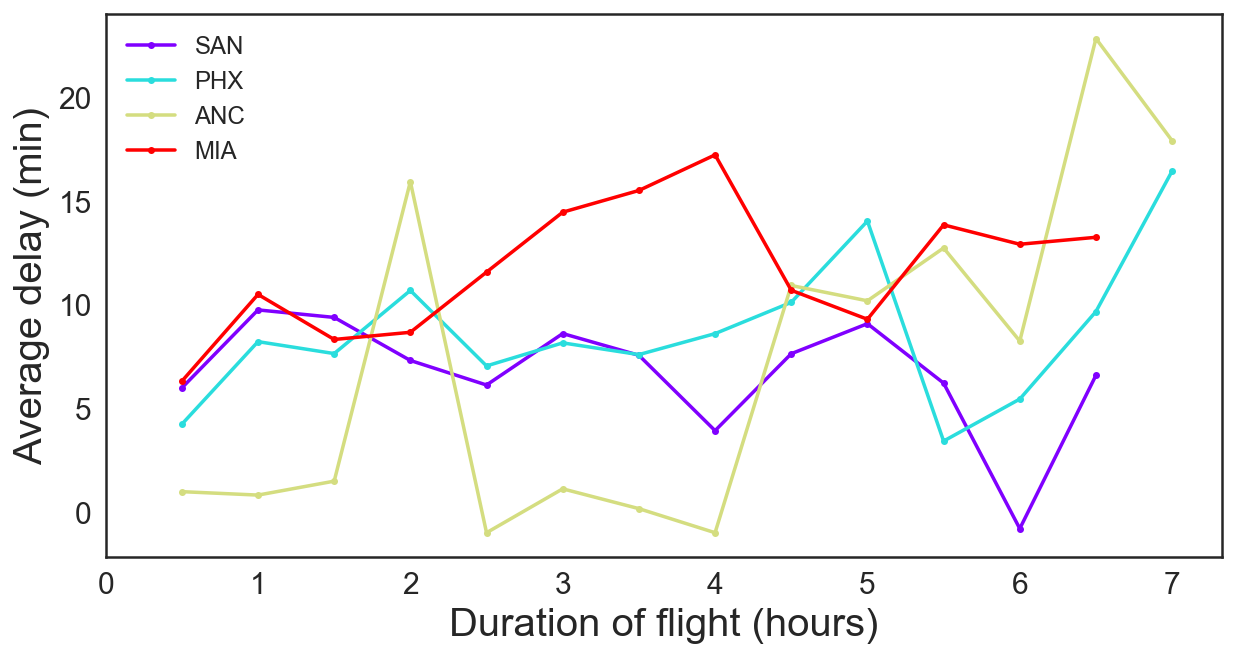

In [95]:
# Plot for many aps
aps = ['SAN','PHX','ANC','MIA']
colors = getcmaprgb(len(aps),cm.rainbow)

plt.figure(figsize=(10,5))
for i, ap in enumerate(aps):
    df_ap = mean_delays.loc[ap]
    hs = df_ap.index.values
    ds = df_ap['DEPARTURE_DELAY']['mean'].values
    plt.plot(hs/2, ds,'.-',color=colors[i],label=ap)
plt.xlabel('Duration of flight (hours)',size=20)
plt.ylabel('Average delay (min)', size=20)
plt.yticks(size=15)
plt.xticks(np.arange(8),size=15)
plt.legend(loc='best',fontsize=12)